# Module 3 Project - London Air Quality analysis

1. [Introduction](#intro)
2. [Exploratory Data Analysis](#EDA)
3. [Cleaning](#Cleaning)
4. [Statistical Analysis](#stats)
5. [Discussion](#disc)



<a id='intro'></a>

1. Introduction

    - background about project
    - motivation
    - hypotheses

In [110]:
import pandas as pd
import numpy as np
import statsmodels.stats as sms
# from functions import APICaller
import seaborn as sns
import matplotlib.pyplot as plt
import requests as req
import time
import scipy.stats as stats
sns.set_style('darkgrid')

In [2]:
# first testing of data retrieval from 1st API
location1 = 'LH0'
date = '2008-06-01'
url_extension = '/Daily/MonitoringIndex/SiteCode='
openaq_caller = APICaller(base_url='http://api.erg.kcl.ac.uk/AirQuality', ignore_token=True)

test_resp = openaq_caller.retrieve_one(url_extension,location=location1, date=date)

test_resp

{'DailyAirQualityIndex': {'@MonitoringIndexDate': '2008-06-01',
  '@TimeToLive': '11',
  'LocalAuthority': {'@LocalAuthorityCode': '17',
   '@LocalAuthorityName': 'Hillingdon',
   '@LaCentreLatitude': '51.533411',
   '@LaCentreLongitude': '-0.452568',
   '@LaCentreLatitudeWGS84': '6716195.906043',
   '@LaCentreLongitudeWGS84': '-50379.639309',
   'Site': {'@BulletinDate': '2008-06-01 00:00:00',
    '@SiteCode': 'LH0',
    '@SiteName': 'Hillingdon - Harlington',
    '@SiteType': 'Urban Background',
    '@Latitude': '51.48878',
    '@Longitude': '-0.441627',
    '@LatitudeWGS84': '6708212.94408',
    '@LongitudeWGS84': '-49161.6927606',
    'Species': [{'@SpeciesCode': 'NO2',
      '@SpeciesDescription': 'Nitrogen Dioxide',
      '@AirQualityIndex': '1',
      '@AirQualityBand': 'Low',
      '@IndexSource': 'Measurement'},
     {'@SpeciesCode': 'O3',
      '@SpeciesDescription': 'Ozone',
      '@AirQualityIndex': '3',
      '@AirQualityBand': 'Low',
      '@IndexSource': 'Measurement'}]}

In [12]:
#  retrieve name of species (pollutants);
url_for_species = '/Information/Species/Json'
# species_list = openaq_caller.retrieve_one(url_extension=url_for_species)
#  http://api.erg.kcl.ac.uk/AirQuality/Information/Species/Json
base_url='http://api.erg.kcl.ac.uk/AirQuality'
def retrieve_one(main_url,url_extension,location=None, date=None, date1=None):  
        if date1!=None:
            response = req.get(main_url+url_extension+f'{location}/StartDate={date}/EndDate={date1}/Json').json()
        elif (date!=None and date1==None):
            response = req.get(main_url+url_extension+f'{location}/Date={date}/Json').json()
        else:
            print(base_url+url_extension)
            response = req.get(main_url+url_extension).json()
        return response
    
    
retrieve_one(main_url=base_url, url_extension=url_for_species)

http://api.erg.kcl.ac.uk/AirQuality/Information/Species/Json


{'AirQualitySpecies': {'Species': [{'@SpeciesCode': 'CO',
    '@SpeciesName': 'Carbon Monoxide',
    '@Description': "Carbon Monoxide is a colourless, odourless poisonous gas produced by incomplete, or inefficient, combustion of fuel including 'cold' or badly tuned engines.",
    '@HealthEffect': 'The gas affects the transport of oxygen around the body by the blood. At very high levels, this can lead to a significant reduction in the supply of oxygen to the heart, particularly in people suffering from heart disease.',
    '@Link': 'http://www.londonair.org.uk/LondonAir/guide/WhatIsCO.aspx'},
   {'@SpeciesCode': 'NO2',
    '@SpeciesName': 'Nitrogen Dioxide',
    '@Description': 'Nitrogen oxides are formed during high temperature combustion processes from the oxidation of nitrogen in the air or fuel.',
    '@HealthEffect': 'Nitrogen Dioxide has several health impacts and includes general irritation to the eyes, irritation of the respiratory system and shortness of breath.',
    '@Link': 

In [36]:
url_for_sites = '/MonitoringIndex/GroupName={GroupName}/Json'
url_for_daily_1_date = '/Daily/MonitoringIndex/GroupName={GroupName}/Date=2018/06/03/Json'
# retrieve_one(main_url=base_url, url_extension=url_for_daily_1_date, )

print(req.get(base_url + url_for_sites))

<Response [404]>


In [55]:
def retrieve_many(main_url,url_ext,location_list,species, start_date_list, end_date_list):
        data = []
        counter=0
        for i in range(len(start_date_list)):
            for location in location_list:
                response = req.get(f'{main_url}{url_ext}/SiteCode={location}/SpeciesCode={species}/StartDate={start_date_list[i]}/EndDate={end_date_list[i]}/Json').json()
                data.append(response)
                counter+=1
            data_df = pd.read_json(data)    
            return data_df
    


In [56]:
response = req.get('http://api.erg.kcl.ac.uk/AirQuality/Data/SiteSpecies/SiteCode=CT3/SpeciesCode=NO2/StartDate=2006/05/01/EndDate=2006/05/02/csv')

print(response)

<Response [404]>


In [51]:
# will set loop to run over multiple dates
base_url='http://api.erg.kcl.ac.uk/AirQuality'
location_list0 = ['LH0','ZR2', 'BL0', 'EN4', 'CT3', 'RI1']
species_code='NO2'
url_data = '/Data/SiteSpecies'
start_dates = ['2006/05/01', '2006/10/01']
end_dates = ['2006/06/01', '2006/11/01']

NO2_LEZ = retrieve_many(main_url=base_url, url_ext = url_data, location_list=location_list0, species=species_code, start_date_list = start_dates, end_date_list = end_dates)

JSONDecodeError: Unexpected UTF-8 BOM (decode using utf-8-sig): line 1 column 1 (char 0)

In [ ]:
# API failed to work after many attempts. Might go back to this. Will just use CSV downloaded data for now. 

In [57]:
df_no2 = pd.read_csv('LaqnData_no2.csv')
print(df_no2.shape)
df_no2.head()

(29946, 6)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO2,01/01/2006 00:00,37.4,ug m-3,R
1,CT3,NO2,02/01/2006 00:00,39.8,ug m-3,R
2,CT3,NO2,03/01/2006 00:00,57.5,ug m-3,R
3,CT3,NO2,04/01/2006 00:00,51.0,ug m-3,R
4,CT3,NO2,05/01/2006 00:00,50.7,ug m-3,R


In [58]:
df_no2.describe()

,Value
count,27790.000000
mean,42.419770
std,17.978645
min,3.500000
25%,29.100000
50%,40.600000
75%,53.400000
max,168.899990


In [59]:
df_no2.Site.value_counts(dropna=False)

RI1    4991
BL0    4991
ZR2    4991
CT3    4991
LH0    4991
EN4    4991
Name: Site, dtype: int64

In [60]:
# convert strings to datetime objects

df_no2.ReadingDateTime = pd.to_datetime(df_no2.ReadingDateTime)
df_no2.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO2,2006-01-01,37.4,ug m-3,R
1,CT3,NO2,2006-02-01,39.8,ug m-3,R
2,CT3,NO2,2006-03-01,57.5,ug m-3,R
3,CT3,NO2,2006-04-01,51.0,ug m-3,R
4,CT3,NO2,2006-05-01,50.7,ug m-3,R


In [61]:
# check number of missing values

df_no2.isna().sum()

Site                          0
Species                       0
ReadingDateTime               0
Value                      2156
Units                         0
Provisional or Ratified       0
dtype: int64

In [62]:
df_no2.loc[(df_no2).Value.isnull()].head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
46,CT3,NO2,2006-02-16,NaN,ug m-3,R
47,CT3,NO2,2006-02-17,NaN,ug m-3,R
204,CT3,NO2,2006-07-24,NaN,ug m-3,R
205,CT3,NO2,2006-07-25,NaN,ug m-3,R
206,CT3,NO2,2006-07-26,NaN,ug m-3,R


In [63]:
# delete the rows with Nan value for the df_no2 DataFrame

df_no2.dropna(inplace=True)
print(df_no2.shape)
df_no2.tail()

(27790, 6)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
29941,EN4,NO2,2019-08-27,45.3,ug m-3,P
29942,EN4,NO2,2019-08-28,19.6,ug m-3,P
29943,EN4,NO2,2019-08-29,21.9,ug m-3,P
29944,EN4,NO2,2019-08-30,29.8,ug m-3,P
29945,EN4,NO2,2019-08-31,29.8,ug m-3,P


In [64]:
# create year column

df_no2['Year'] = df_no2.ReadingDateTime.dt.year
df_no2.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Year
0,CT3,NO2,2006-01-01,37.4,ug m-3,R,2006
1,CT3,NO2,2006-02-01,39.8,ug m-3,R,2006
2,CT3,NO2,2006-03-01,57.5,ug m-3,R,2006
3,CT3,NO2,2006-04-01,51.0,ug m-3,R,2006
4,CT3,NO2,2006-05-01,50.7,ug m-3,R,2006


In [66]:
df_no2['Provisional or Ratified'].value_counts()

R    26702
P     1088
Name: Provisional or Ratified, dtype: int64

In [68]:
# create new dataframe with only the value and year columns

df_no2_new = df_no2.drop(['Site','Species','ReadingDateTime','Units','Provisional or Ratified'],axis=1)
df_no2_new.head()

,Value,Year
0,37.4,2006
1,39.8,2006
2,57.5,2006
3,51.0,2006
4,50.7,2006


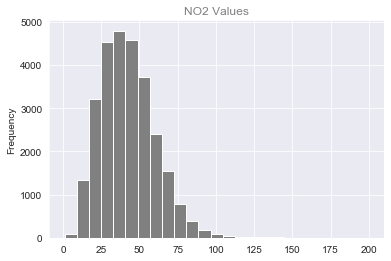

In [72]:
# make a frequency barplot

df_no2.Value.plot.hist(range=(1, 200), bins=25, color='grey')
plt.title('NO2 Values', color = 'grey')
plt.show()

In [73]:
# create PM10 particulates DataFrame

df_pm10 = pd.read_csv('LaqnData_pm10.csv')
print(df_pm10.shape)
df_pm10.head()

(29946, 6)


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,PM10,01/01/2006 00:00,7.0,ug/m3,R
1,CT3,PM10,02/01/2006 00:00,14.0,ug/m3,R
2,CT3,PM10,03/01/2006 00:00,19.0,ug/m3,R
3,CT3,PM10,04/01/2006 00:00,18.0,ug/m3,R
4,CT3,PM10,05/01/2006 00:00,20.0,ug/m3,R


In [74]:
# check number of sites 

df_pm10.Site.value_counts(dropna=False)

RI1    4991
BL0    4991
ZR2    4991
CT3    4991
LH0    4991
EN4    4991
Name: Site, dtype: int64

In [77]:
len(df_pm10)

29946

In [76]:
df_pm10.loc[df_pm10.Value.isna()]
# given that we have ~4600 NaN values amongst nearly 30k values, we can drop them

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
46,CT3,PM10,16/02/2006 00:00,NaN,ug/m3,R
47,CT3,PM10,17/02/2006 00:00,NaN,ug/m3,R
48,CT3,PM10,18/02/2006 00:00,NaN,ug/m3,R
49,CT3,PM10,19/02/2006 00:00,NaN,ug/m3,R
50,CT3,PM10,20/02/2006 00:00,NaN,ug/m3,R
...,...,...,...,...,...,...
29941,EN4,PM10,27/08/2019 00:00,NaN,ug/m3,P
29942,EN4,PM10,28/08/2019 00:00,NaN,ug/m3,P
29943,EN4,PM10,29/08/2019 00:00,NaN,ug/m3,P
29944,EN4,PM10,30/08/2019 00:00,NaN,ug/m3,P


In [78]:
df_pm10 = df_pm10.dropna()

In [79]:
df_pm10.loc[df_pm10.Value.isna()]


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified


In [80]:
df_pm10.ReadingDateTime = pd.to_datetime(df_pm10.ReadingDateTime)
df_pm10.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,PM10,2006-01-01,7.0,ug/m3,R
1,CT3,PM10,2006-02-01,14.0,ug/m3,R
2,CT3,PM10,2006-03-01,19.0,ug/m3,R
3,CT3,PM10,2006-04-01,18.0,ug/m3,R
4,CT3,PM10,2006-05-01,20.0,ug/m3,R


In [81]:
df_pm10['Year'] = df_pm10.ReadingDateTime.dt.year
df_pm10.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Year
0,CT3,PM10,2006-01-01,7.0,ug/m3,R,2006
1,CT3,PM10,2006-02-01,14.0,ug/m3,R,2006
2,CT3,PM10,2006-03-01,19.0,ug/m3,R,2006
3,CT3,PM10,2006-04-01,18.0,ug/m3,R,2006
4,CT3,PM10,2006-05-01,20.0,ug/m3,R,2006


In [82]:
# create new dataframe with only the value and year columns

df_pm10_new = df_pm10.drop(['Site','Species','ReadingDateTime','Units','Provisional or Ratified'],axis=1)
df_pm10_new.head()

,Value,Year
0,7.0,2006
1,14.0,2006
2,19.0,2006
3,18.0,2006
4,20.0,2006


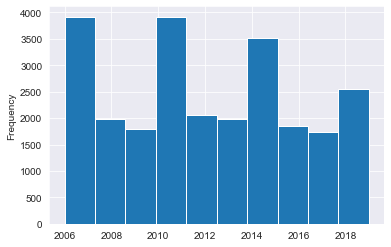

In [83]:
df_pm10_new['Year'].plot.hist()
# given that the data across time is non-uniform, for unknown reasons, we'll be trying to select pre- and post-ULEZ 
# data from 2006,2010,2014 and 2018

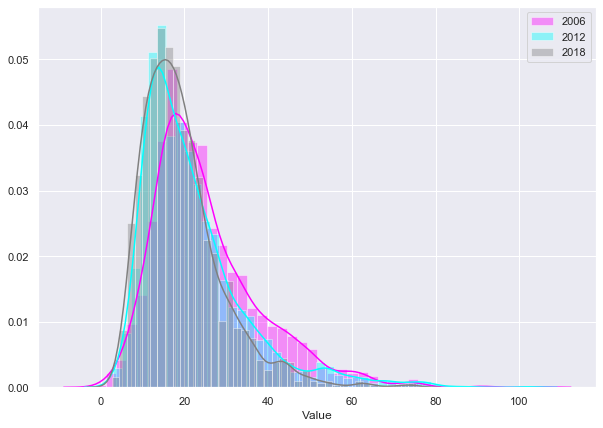

In [84]:
sns.set_color_codes('dark')
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(df_pm10_new.loc[df_pm10_new['Year']==2006]['Value'], color='magenta')
sns.distplot(df_pm10_new.loc[df_pm10_new['Year']==2012]['Value'], color='cyan')
sns.distplot(df_pm10_new.loc[df_pm10_new['Year']==2018]['Value'], color='grey')
plt.legend(labels=['2006', '2012', '2018'])

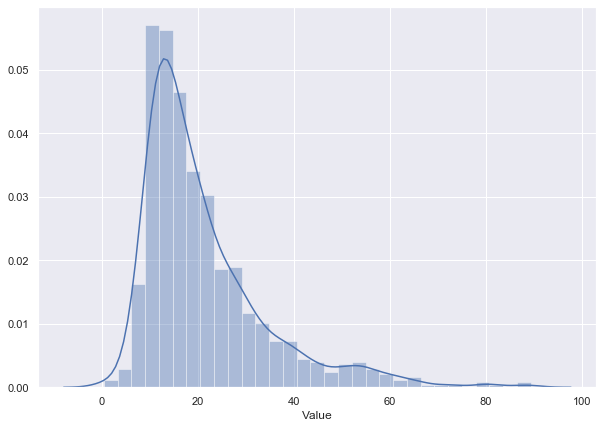

In [85]:
sns.distplot(df_pm10_new.loc[df_pm10_new['Year']==2019]['Value'])

In [88]:
df_pm10.head(20)

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Year
0,CT3,PM10,2006-01-01,7.0,ug/m3,R,2006
1,CT3,PM10,2006-02-01,14.0,ug/m3,R,2006
2,CT3,PM10,2006-03-01,19.0,ug/m3,R,2006
3,CT3,PM10,2006-04-01,18.0,ug/m3,R,2006
4,CT3,PM10,2006-05-01,20.0,ug/m3,R,2006
5,CT3,PM10,2006-06-01,28.0,ug/m3,R,2006
6,CT3,PM10,2006-07-01,33.0,ug/m3,R,2006
7,CT3,PM10,2006-08-01,34.0,ug/m3,R,2006
8,CT3,PM10,2006-09-01,36.0,ug/m3,R,2006
9,CT3,PM10,2006-10-01,21.0,ug/m3,R,2006


In [90]:
df_pm10['Month'] = df_pm10.ReadingDateTime.dt.month
df_pm10

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Year,Month
0,CT3,PM10,2006-01-01,7.0,ug/m3,R,2006,1
1,CT3,PM10,2006-02-01,14.0,ug/m3,R,2006,2
2,CT3,PM10,2006-03-01,19.0,ug/m3,R,2006,3
3,CT3,PM10,2006-04-01,18.0,ug/m3,R,2006,4
4,CT3,PM10,2006-05-01,20.0,ug/m3,R,2006,5
...,...,...,...,...,...,...,...,...
28671,EN4,PM10,2016-05-03,25.8,ug/m3,R,2016,5
28672,EN4,PM10,2016-06-03,26.4,ug/m3,R,2016,6
28673,EN4,PM10,2016-07-03,30.2,ug/m3,R,2016,7
28674,EN4,PM10,2016-08-03,34.9,ug/m3,R,2016,8


In [91]:
df_no2['Month'] = df_no2.ReadingDateTime.dt.month
df_no2

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified,Year,Month
0,CT3,NO2,2006-01-01,37.4,ug m-3,R,2006,1
1,CT3,NO2,2006-02-01,39.8,ug m-3,R,2006,2
2,CT3,NO2,2006-03-01,57.5,ug m-3,R,2006,3
3,CT3,NO2,2006-04-01,51.0,ug m-3,R,2006,4
4,CT3,NO2,2006-05-01,50.7,ug m-3,R,2006,5
...,...,...,...,...,...,...,...,...
29941,EN4,NO2,2019-08-27,45.3,ug m-3,P,2019,8
29942,EN4,NO2,2019-08-28,19.6,ug m-3,P,2019,8
29943,EN4,NO2,2019-08-29,21.9,ug m-3,P,2019,8
29944,EN4,NO2,2019-08-30,29.8,ug m-3,P,2019,8


In [142]:
# For our comparison groups we will be selecting Sites, Species, Value, Units, Year and Month for May and Sep 2006 & 2009
test_df_no2 = df_no2.loc[(df_no2.Month == 5)|(df_no2.Month == 9)].drop(columns=['ReadingDateTime','Provisional or Ratified'])
test_df_pm10 = df_pm10.loc[(df_pm10.Month == 5)|(df_pm10.Month == 9)].drop(columns=['ReadingDateTime','Provisional or Ratified'])

test_df_no2.head()

,Site,Species,Value,Units,Year,Month
4,CT3,NO2,50.7,ug m-3,2006,5
8,CT3,NO2,48.9,ug m-3,2006,9
35,CT3,NO2,71.1,ug m-3,2006,5
39,CT3,NO2,62.2,ug m-3,2006,9
63,CT3,NO2,68.0,ug m-3,2006,5


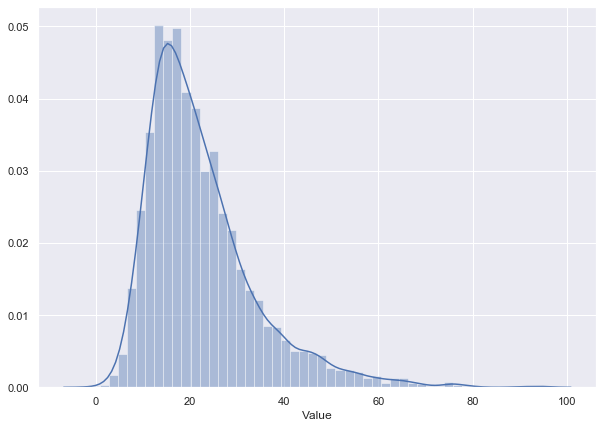

In [143]:
sns.distplot(test_df_pm10.Value)

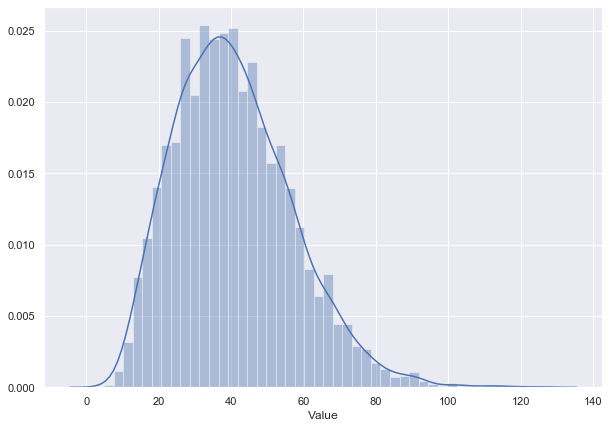

In [144]:
sns.distplot(test_df_no2.Value)

In [145]:
len(test_df_pm10)

4229

In [146]:
len(test_df_no2)

4623

In [147]:
len(test_df_no2.loc[test_df_no2['Year']==2006])

349

In [148]:
len(test_df_no2.loc[test_df_no2['Year']==2009])

332

In [149]:
# Now we make our testing samples below, for May and Oct 2006, 2009, for both the PM10 and the NO2 values. 
pre_lez_no2 = test_df_no2.loc[test_df_no2['Year']==2006]
post_lez_no2 = test_df_no2.loc[test_df_no2['Year']==2009]

pre_lez_pm10 = test_df_pm10.loc[test_df_pm10['Year']==2006]
post_lez_pm10 = test_df_pm10.loc[test_df_pm10['Year']==2009]

## Statistical Testing

(Mina)

1. The introducton of ULEZ (8th April 2019) decreased the amount of NOx in Zone 1 of Central London by at least 42%. 
[H0] - ULEZ reduced the amount of NOx in Zone 1 by less than 42%.
2. The introduction of ULEZ was at least 25% more effective than the introduction of LEZ (4th February 2008) in reducing NOx levels in Central London.
[H0] - The effect of ULEZ on NOx levels was less than 25% more than the impact of LEZ. 

(Ioana) 
3. The introducton of ULEZ decreased the amount of PM10 in Zone 1 of Central London by at least 33%. 
[H0] - ULEZ reduced the amount of PM10 in Zone 1 by less than 33%.
4. The introduction of ULEZ was at least 25% more effective than the introduction of LEZ in reducing PM10 levels in Central London. 
[H0] - The effect of ULEZ on PM10 levels was less than 25% more than the impact of LEZ. 

Our alpha values are set at 0.05.

In [150]:
def sample_variance(sample):
    return np.sum([(x - np.mean(sample))**2 for x in sample])/(len(sample)-1)

def pooled_variance(sample1, sample2):
    return ((len(sample1)-1)*sample_variance(sample1) + (len(sample2)-1)*sample_variance(sample2))/(len(sample1) + len(sample2) - 2)


def visualize_t(t_stat, n_control, n_experimental):
    df = len(n_experimental)-1
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(15,10))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4,4,200)
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    ys = stats.t.pdf(xs, df, 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkblue')

    # Draw two sided boundary for critical-t
    ax.axvline(x=+t_stat, color='red', linestyle='--', lw=3,label='t-statistic_lower_bound')
    ax.axvline(x=-t_stat, color='purple', linestyle='--', lw=3,label='t-statistic_upper_bound')
    ax.legend()
    plt.show()
    return 

def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()
    # Calculate the pooled threshold as shown earlier
    pooled_var = pooled_variance(group1, group2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


def welch_t_test(sample1,sample2):
    num = np.mean(sample1)-np.mean(sample2)
    denom = np.sqrt((sample_variance(sample1)**2/len(sample1)) + (sample_variance(sample2)**2/len(sample2)))
    return num/denom
 
def welch_t(sample1, sample2):
    numerator = np.mean(sample1) - np.mean(sample2)   
    denominator = np.sqrt(np.var(sample1)/len(sample1) + np.var(sample2)/len(sample2))
    return np.abs(numerator/denominator)    
    
def deg_of_freedom(sample1,sample2):
    num = ((sample_variance(sample1)**2/len(sample1)) + (sample_variance(sample2)**2/len(sample2)))**2
    denom = sample_variance(sample1)**4/((len(sample1)**2)*(len(sample1)-1)) + sample_variance(sample2)**4/((len(sample2)**2)*(len(sample2)-1))
    return num/denom


def welch_dof(sample1,sample2):
    
    
    return num/denom
              
def p_val(t_stat, df):
    return 1-stats.t.cdf(t_stat,df)

In [151]:
p_val(welch_t(pre_lez_no2.Value, post_lez_no2.Value), deg_of_freedom(pre_lez_no2.Value, post_lez_no2.Value))

0.05129247253374236

In [152]:
p_val(welch_t(pre_lez_pm10.Value, post_lez_pm10.Value), deg_of_freedom(pre_lez_pm10.Value, post_lez_pm10.Value))

0.32359196260048106

In [153]:
stats.ttest_ind(pre_lez_no2.Value, post_lez_no2.Value)

Ttest_indResult(statistic=-1.6313860143190506, pvalue=0.10327258459111915)

Having conducted our statistical significance test for LEZ, we conclude that there was a significant impact on NO2 levels due to LEZ, but our p-value for the PM10 levels was so large that we cannot reject the null hypothesis that LEZ had no impact on PM10. Given that we're trying to compare ULEZ to LEZ impact, we will return to the PM10 levels once we have conducted our tests on the ULEZ dates

In [124]:
pre_ulez_no2 = test_df_no2.loc[test_df_no2['Year']==2017]
post_ulez_no2 = test_df_no2.loc[test_df_no2['Year']==2019]

pre_ulez_pm10 = test_df_pm10.loc[test_df_pm10['Year']==2017]
post_ulez_pm10 = test_df_pm10.loc[test_df_pm10['Year']==2019]

In [125]:
len(pre_ulez_no2)

366

In [126]:
len(post_ulez_no2)

168

In [127]:
len(pre_ulez_pm10)

302

In [128]:
len(post_ulez_pm10)

126